### Generate plots of firing rates, rasters of RPE and Feature selective units
- Example RPE selective unit: 20180803, unit 17 (PFC)
- Example Pattern selective unit: 2018072500001 unit 12 (HC)
- Example Combined unit: 20180803, unit 30


In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.visualization_utils as visualization_utils
import utils.behavioral_utils as behavioral_utils
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)

import os
import pandas as pd
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
SUBJECT = "SA"
SESSIONS_PATH = "/data/patrick_res/sessions/valid_sessions_rpe.pickle"
SESS_BEHAVIOR_PATH = "/data/rawdata/sub-SA/sess-{sess_name}/behavior/sub-SA_sess-{sess_name}_object_features.csv"

PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 50
SMOOTH = 1
EVENT = "FeedbackOnset"

FEATURE_DIMS = ["Color", "Shape", "Pattern"]

In [9]:
valid_sess = pd.read_pickle(SESSIONS_PATH)
units = spike_utils.get_unit_positions(valid_sess)

In [18]:
def get_data(session):
    behavior_path = SESS_BEHAVIOR_PATH.format(sess_name=session)
    beh = pd.read_csv(behavior_path)

    # filter trials 
    valid_beh = behavioral_utils.get_valid_trials(beh)
    feature_selections = behavioral_utils.get_selection_features(valid_beh)
    valid_beh = pd.merge(valid_beh, feature_selections, on="TrialNumber")
    valid_beh_rpes = behavioral_utils.get_rpe_groups_per_session(session, valid_beh)
    fr_path = f"/data/patrick_res/firing_rates/{session}_firing_rates_{PRE_INTERVAL}_{EVENT}_{POST_INTERVAL}_{INTERVAL_SIZE}_bins_{SMOOTH}_smooth.pickle"
    frs = pd.read_pickle(fr_path)

    pos = spike_utils.get_unit_positions_per_sess(session)
    pos = pos.fillna("unknown")
    pos = spike_utils.get_manual_structure(pos)

    spike_times = spike_general.get_spike_times(None, SUBJECT, session, species_dir="/data")
    intervals = behavioral_utils.get_trial_intervals(valid_beh, EVENT, PRE_INTERVAL, POST_INTERVAL)
    spike_by_trial_interval = spike_utils.get_spikes_by_trial_interval(spike_times, intervals)
    spike_by_trial_interval.TrialNumber = spike_by_trial_interval.TrialNumber.astype(int)
    return frs, spike_by_trial_interval, valid_beh_rpes, pos

In [46]:
def plot_raster(unit, spike_times, beh, group_name, group_colors, group_ordering, ax):
    group_offset = 0
    unit_spikes = spike_times[spike_times.UnitID == unit]
    for group in group_ordering:
        group_beh = beh[beh[group_name] == group]
        group_beh["Y"] = np.arange(len(group_beh)).astype(int) + group_offset
        group_offset += len(group_beh)
        spikes = pd.merge(unit_spikes, group_beh, on="TrialNumber")
        spikes["X"] = (spikes.SpikeTimeFromStart - PRE_INTERVAL) / 1000
        ax.scatter(spikes.X, spikes.Y, marker="_", linewidths=1.5, label=group, s=1, color=group_colors[group])

### Look at RPE selective first

In [61]:
session = "20180803"
unit = 17
frs, spike_times, beh, pos = get_data(session)

Calculating spikes by trial interval


/tmp/ipykernel_2119594/1513157827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_beh["Y"] = np.arange(len(group_beh)).astype(int) + group_offset
/tmp/ipykernel_2119594/1513157827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_beh["Y"] = np.arange(len(group_beh)).astype(int) + group_offset
/tmp/ipykernel_2119594/1513157827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

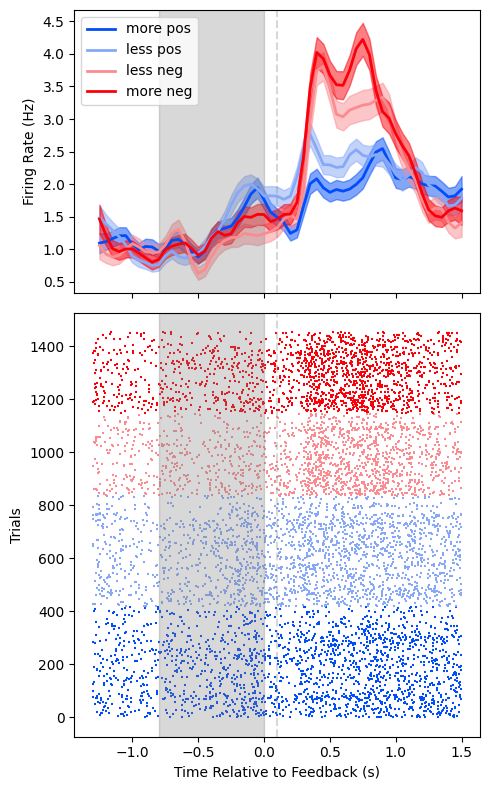

In [62]:
fig, axs = plt.subplots(2, 1, figsize=(5, 8), gridspec_kw={'height_ratios': [4, 6]}, sharex=True)
group_name = "RPEGroup"
group_colors = {
    "more pos": "#024dfa",
    "less pos": "#86a8f7",
    "less neg": "#fa8c91",
    "more neg": "#fa000b",
}
group_ordering = ["more pos", "less pos", "less neg", "more neg"]
ax = axs[0]
visualization_utils.plot_mean_frs_by_group(
    session, unit, frs, beh, group_name, pos, ax, 
    mode="FiringRate", group_colors=group_colors, group_order=group_ordering, set_ax=False
)
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
ax.set_ylabel("Firing Rate (Hz)")
ax = axs[1]
plot_raster(unit, spike_times, beh, group_name, group_colors, group_ordering, ax)
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')        
ax.set_ylabel("Trials")
ax.set_xlabel("Time Relative to Feedback (s)")
fig.tight_layout()


### Now do Pattern selective neuron

In [64]:
session = "201807250001"
unit = 12
frs, spike_times, beh, pos = get_data(session)

Calculating spikes by trial interval


/tmp/ipykernel_2119594/1513157827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_beh["Y"] = np.arange(len(group_beh)).astype(int) + group_offset
/tmp/ipykernel_2119594/1513157827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_beh["Y"] = np.arange(len(group_beh)).astype(int) + group_offset
/tmp/ipykernel_2119594/1513157827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

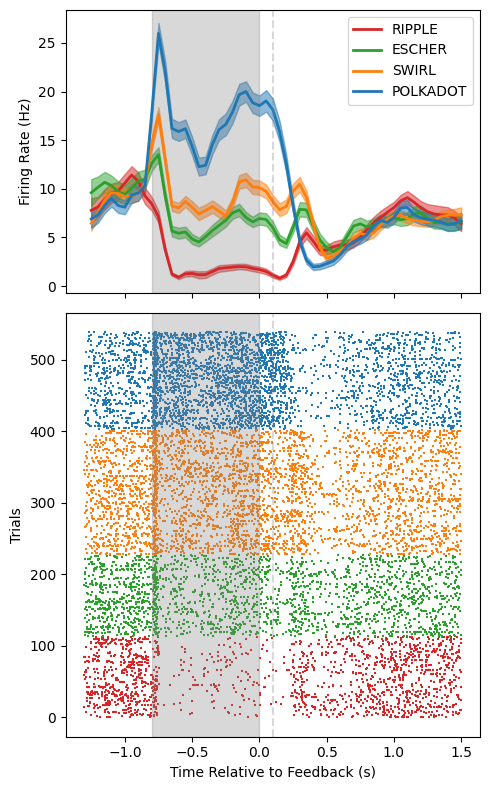

In [65]:
fig, axs = plt.subplots(2, 1, figsize=(5, 8), gridspec_kw={'height_ratios': [4, 6]}, sharex=True)
group_name = "Pattern"
group_colors = {
    "POLKADOT": "tab:blue", 
    "SWIRL": "tab:orange", 
    "ESCHER": "tab:green", 
    "RIPPLE": "tab:red"
}
# group_ordering = ["POLKADOT", "SWIRL", "ESCHER", "RIPPLE"]
group_ordering = ["RIPPLE", "ESCHER", "SWIRL", "POLKADOT"]

ax = axs[0]
visualization_utils.plot_mean_frs_by_group(
    session, unit, frs, beh, group_name, pos, ax, 
    mode="FiringRate", group_colors=group_colors, group_order=group_ordering, set_ax=False
)
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
ax.set_ylabel("Firing Rate (Hz)")
ax = axs[1]
plot_raster(unit, spike_times, beh, group_name, group_colors, group_ordering, ax)
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')        
ax.set_ylabel("Trials")
ax.set_xlabel("Time Relative to Feedback (s)")
fig.tight_layout()


### Combined selective unit

Calculating spikes by trial interval


/tmp/ipykernel_2119594/1513157827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_beh["Y"] = np.arange(len(group_beh)).astype(int) + group_offset
/tmp/ipykernel_2119594/1513157827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_beh["Y"] = np.arange(len(group_beh)).astype(int) + group_offset
/tmp/ipykernel_2119594/1513157827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

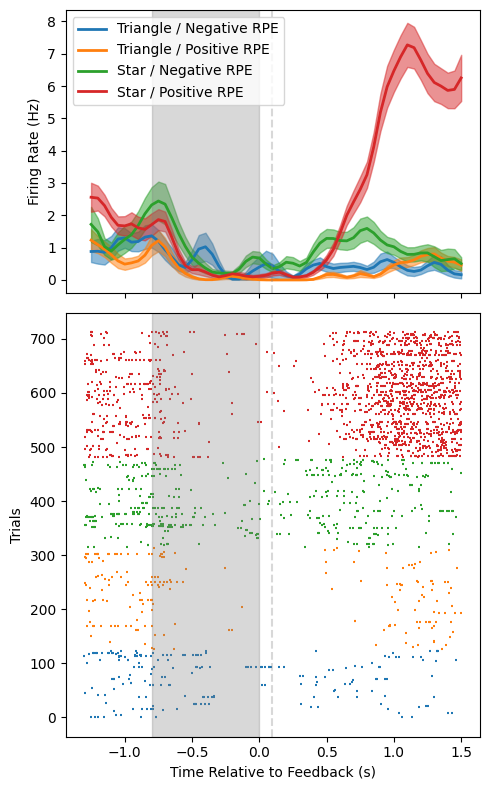

In [69]:
session = "20180803"
unit = 30
frs, spike_times, beh, pos = get_data(session)
beh["combined"] = beh["Shape"] + " " + beh["Response"]
# sub_beh = valid_beh[valid_beh.Shape.isin(["STAR", "TRIANGLE"]) & valid_beh.RPEGroup.isin(["more pos", "less pos"])]
beh = beh[beh.Shape.isin(["STAR", "TRIANGLE"])]
group_label = {
    "TRIANGLE Incorrect": "Triangle / Negative RPE",
    "TRIANGLE Correct": "Triangle / Positive RPE",
    "STAR Incorrect": "Star / Negative RPE",
    "STAR Correct": "Star / Positive RPE",
}
group_colors = {
    "TRIANGLE Incorrect": "tab:blue", 
    "TRIANGLE Correct": "tab:orange", 
    "STAR Incorrect": "tab:green", 
    "STAR Correct": "tab:red"
}
group_name = "combined"
group_ordering = ["TRIANGLE Incorrect", "TRIANGLE Correct", "STAR Incorrect", "STAR Correct"]

fig, axs = plt.subplots(2, 1, figsize=(5, 8), gridspec_kw={'height_ratios': [4, 6]}, sharex=True)
# group_ordering = ["POLKADOT", "SWIRL", "ESCHER", "RIPPLE"]

ax = axs[0]
visualization_utils.plot_mean_frs_by_group(
    session, unit, frs, beh, group_name, pos, ax, 
    mode="FiringRate", group_colors=group_colors, group_label=group_label,
    group_order=group_ordering, set_ax=False
)
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
ax.set_ylabel("Firing Rate (Hz)")
ax = axs[1]
plot_raster(unit, spike_times, beh, group_name, group_colors, group_ordering, ax)
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')        
ax.set_ylabel("Trials")
ax.set_xlabel("Time Relative to Feedback (s)")
fig.tight_layout()